# Twig-proofreading main analysis

<br>**CONTENT**
<br>This notebook contains the following type of analysis and plot:

<br>A) Global (non-column specific) analysis of data distributions before and after proofreading
- Step distributions, density histograms, kernal density estimation, cummulative distributions, box plot and Q-Q plot for number of connections "counts" with all presynaptic inputs.

<br>B) Column-specific analysis o before and after proofreading
- Total count and count different between after and before twig-proofreading 
- Counts change per segments in the different columns (not finished)


In [2]:
#Importing packages
import navis
import fafbseg
from fafbseg import flywire
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from caveclient import CAVEclient
client = CAVEclient('flywire_fafb_production')

C:\Users\sebas\anaconda3\envs\EM\lib\site-packages\blessed\terminal.py:186: UserWarning: Failed to setupterm(kind='xterm-color'): Could not find terminal xterm-color
  warnings.warn(msg)


In [3]:
#Plots settings

font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 12}
axes = {'labelsize': 16, 'titlesize': 16}
ticks = {'labelsize': 14}
legend = {'fontsize': 14}
plt.rc('font', **font)
plt.rc('axes', **axes)
plt.rc('xtick', **ticks)
plt.rc('ytick', **ticks)


## A) GLobal (non-column specific) analysis of data distributions before and after proofreading

### 1. Loading data set from an excel file

In [48]:
#Choose path and file
dataPath = r'D:\Connectomics-Data\FlyWire\Excels\drive-data-sets'
# fileDate = '20230111'
fileName = f'All_Tm9_neurons_input_count_ME_R_impact_twig_proofreading_{fileDate}.xlsx'
neuron_name = 'Tm9'
fileDate = '20230206'
#fileName = f'All_Tm1_neurons_input_count_ME_R_impact_twig_proofreading_{fileDate}.xlsx'
#neuron_name = 'Tm1'
filePath = os.path.join(dataPath,fileName)
df = pd.read_excel(filePath)

In [49]:
#Filtering out separator row (e.g.,"NEXT INPUTS") and data were backbone-proofread was also done
df = df[(df['presynaptic_ID'] != 'NEXT INPUTS') & (df['comments'] != 'backbone-proofread')].copy()

In [50]:
#Filtering out all counts bigger than X number
apply_threshold = True
synapse_range = 'all synapses'

if apply_threshold:
    min_threshold = 3
    max_threshold = 150
    df = df[(df['counts'] >= min_threshold) & (df['counts'] <= max_threshold)].copy()
    synapse_range = f'synapses range: {min_threshold} - {max_threshold}'  


In [51]:
# Some quentifications
before_stats = df[df['twig_proofreading'] == 'before'].describe()
after_stats = df[df['twig_proofreading'] == 'after'].describe()
n = len(df['column_ID'].unique())
total_syn_number_before = df[df['twig_proofreading'] == 'before']['counts'].sum() 
total_syn_number_after = df[df['twig_proofreading'] == 'after']['counts'].sum() 
absolut_syn_number_change = total_syn_number_after - total_syn_number_before
relative_syn_number_change = (total_syn_number_after - total_syn_number_before)/total_syn_number_before

### 2. Printing and plotting basic information about the dataset

#### Printing:

In [52]:
print(f"Number of neurons/columns being analyzed: {n}")
print(f"Number of rows: {len(df)}")
print(f"Synapse counts being considered: {synapse_range}")
print(f"Mean across columns, the absolute change in synapse number: {absolut_syn_number_change/n}")
print(f"Mean across columns, the percentage change in synapse number: {round((relative_syn_number_change *100)/n,2)} %")
print(f"Mean across columns, new partners: {(after_stats.loc['count'][0]-before_stats.loc['count'][0])/n}")
print('---------------------------------------------')
print(f"Before twig-proofreading: \n\n {before_stats}")
print('---------------------------------------------')
print(f"After twig-proofreading: \n\n {after_stats}")

Number of neurons/columns being analyzed: 10
Number of rows: 228
Synapse counts being considered: synapses range: 3 - 150
Mean across columns, the absolute change in synapse number: 14.9
Mean across columns, the percentage change in synapse number: 1.67 %
Mean across columns, new partners: 1.6
---------------------------------------------
Before twig-proofreading: 

            counts
count  106.000000
mean     8.415094
std      9.414141
min      3.000000
25%      3.000000
50%      4.000000
75%      8.000000
max     46.000000
---------------------------------------------
After twig-proofreading: 

            counts
count  122.000000
mean     8.532787
std      9.635664
min      3.000000
25%      3.000000
50%      5.000000
75%      7.750000
max     46.000000


#### Plotting data ditribution:

Text(0.5, 0, 'number of inputs')

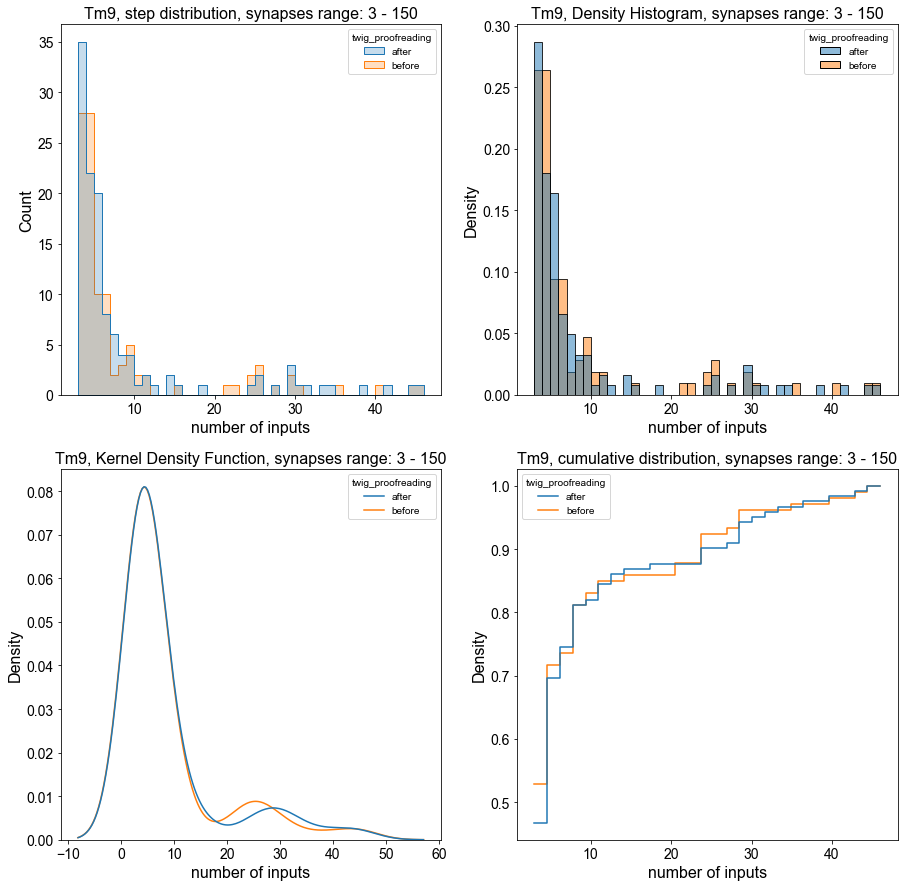

In [53]:
# Potting distributions

fig, axs = plt.subplots(2, 2,figsize=(15, 15))
sns.histplot(df, x="counts", hue="twig_proofreading", binwidth=1,element="step", common_norm=False, ax=axs[0,0]) 
axs[0,0].set_title(f'{neuron_name}, step distribution, {synapse_range}')
axs[0,0].set_xlabel('number of inputs')
# another axis

sns.histplot(data=df, x="counts", hue="twig_proofreading", binwidth=1, stat='density', common_norm=False, ax=axs[0,1]);
axs[0,1].set_title(f'{neuron_name}, Density Histogram, {synapse_range}')
axs[0,1].set_xlabel('number of inputs')


# sns.histplot(df, x="counts", hue="twig_proofreading", binwidth=1,multiple="dodge", ax=axs[0,1]) 
# axs[0,1].set_title(f'{neuron_name}, dodge distribution, {synapse_range}')
# axs[0,1].set_xlabel('number of inputs')
# another axis
sns.kdeplot(data = df, x="counts", hue="twig_proofreading", common_norm = False, ax=axs[1,0])
axs[1,0].set_title(f'{neuron_name}, Kernel Density Function, {synapse_range}')
axs[1,0].set_xlabel('number of inputs')
# another axis
sns.histplot(
    data=df, x="counts", hue="twig_proofreading",
    hue_order=["after", "before"],
    log_scale=False, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
    ax=axs[1,1]) 
axs[1,1].set_title(f'{neuron_name}, cumulative distribution, {synapse_range}')
axs[1,1].set_xlabel('number of inputs')

#### Plotting difference of distributions


About the plots: 

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

In [54]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import scipy.stats

#KDE calculations
a = df[df['twig_proofreading'] == 'after']['counts']
b = df[df['twig_proofreading'] == 'before']['counts']
kdea = scipy.stats.gaussian_kde(a)
kdeb = scipy.stats.gaussian_kde(b)
grid_a = np.linspace(min(a),max(a), 10000)
grid_b = np.linspace(min(b),max(b), 10000)
grid_ab = np.linspace(min(min(a),min(b)),max(max(a),max(b)), 10000)

In [55]:
# Quartiles calculations
counts = df['counts'].values
counts_a = df.loc[df.twig_proofreading=='after', 'counts'].values
counts_b = df.loc[df.twig_proofreading=='before', 'counts'].values

df_pct = pd.DataFrame()
df_pct['q_after'] = np.percentile(counts_a, range(100))
df_pct['q_before'] = np.percentile(counts_b, range(100))

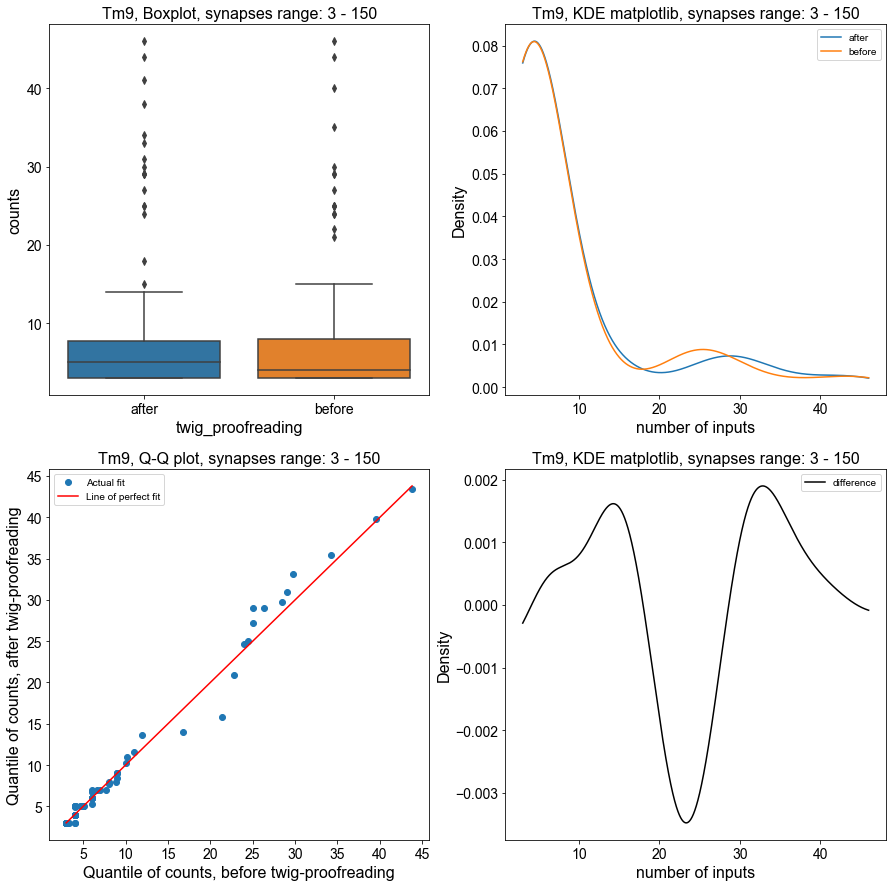

In [56]:
#Plotting
fig, axs = plt.subplots(2, 2,figsize=(15, 15))
sns.boxplot(data=df, x="twig_proofreading", y="counts", ax = axs[0,0]);
axs[0,0].set_title(f'{neuron_name}, Boxplot, {synapse_range}');

# another axis
axs[0,1].plot(grid_a, kdea(grid_a), label="after")
axs[0,1].plot(grid_b, kdeb(grid_b), label="before")
axs[0,1].set_title(f'{neuron_name}, KDE matplotlib, {synapse_range}')
axs[0,1].set_xlabel('number of inputs')
axs[0,1].set_ylabel('Density')
axs[0,1].legend()

# another axis
axs[1,1].plot(grid_ab, kdea(grid_ab)-kdeb(grid_ab), color ="k", label="difference")
axs[1,1].set_title(f'{neuron_name}, KDE matplotlib, {synapse_range}')
axs[1,1].set_xlabel('number of inputs')
axs[1,1].set_ylabel('Density')
axs[1,1].legend()

#another axis

axs[1,0].scatter(x='q_before', y='q_after', data=df_pct, label='Actual fit');
sns.lineplot(x='q_before', y='q_before', data=df_pct, color='r', label='Line of perfect fit',  ax = axs[1,0]);
axs[1,0].set_xlabel('Quantile of counts, before twig-proofreading')
axs[1,0].set_ylabel('Quantile of counts, after twig-proofreading')
axs[1,0].legend()
axs[1,0].set_title(f'{neuron_name}, Q-Q plot, {synapse_range}');



#### Two-gruop tests

Check this website to add some useful statistical analysis: https://towardsdatascience.com/how-to-compare-two-or-more-distributions-9b06ee4d30bf

## B) Column-specific analysis o before and after proofreading

### 1. Loading data set from an excel file

In [78]:
#Choose path and file
dataPath = r'D:\Connectomics-Data\FlyWire\Excels\drive-data-sets'
# fileDate = '20230111'
fileName = f'All_Tm9_neurons_input_count_ME_R_impact_twig_proofreading_{fileDate}.xlsx'
neuron_name = 'Tm9'
fileDate = '20230206'
#fileName = f'All_Tm1_neurons_input_count_ME_R_impact_twig_proofreading_{fileDate}.xlsx'
#neuron_name = 'Tm1'
filePath = os.path.join(dataPath,fileName)
df = pd.read_excel(filePath)

In [79]:
#Filtering out separator row (e.g.,"NEXT INPUTS") and data were backbone-proofread was also done
df = df[(df['presynaptic_ID'] != 'NEXT INPUTS') & (df['comments'] != 'backbone-proofread')].copy()


In [80]:
#Filtering out all counts bigger than X number
apply_threshold = True
synapse_range = 'all synapses'

if apply_threshold:
    min_threshold = 1
    max_threshold = 1000
    df = df[(df['counts'] >= min_threshold) & (df['counts'] <= max_threshold)].copy()
    synapse_range = f'synapses range: {min_threshold} - {max_threshold}'  

### 2. Plotting basic information

#### Plotting data per columns. 

Text(0.5, 65.00000000000009, 'all columns')

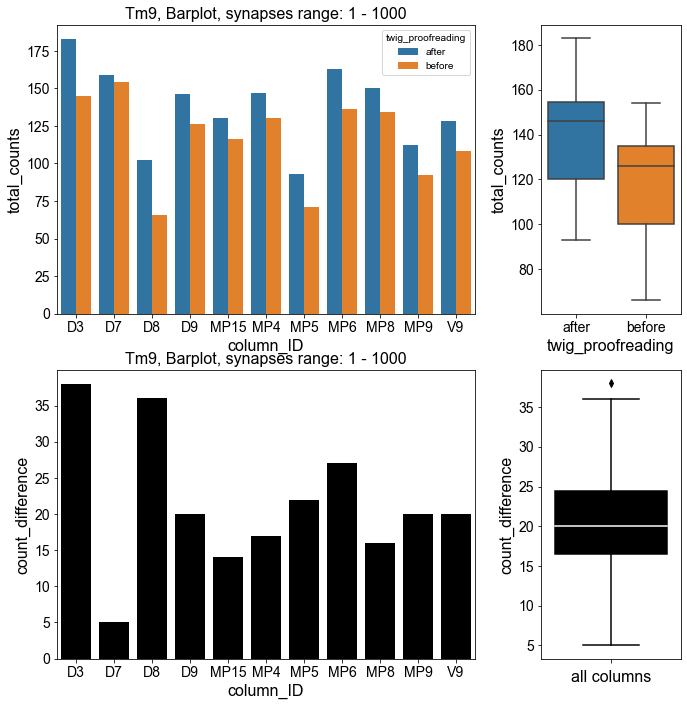

In [81]:
#Plotting with seaborn
# perform groupby
df_grouped = df.copy()
df_grouped= df_grouped.groupby(['column_ID', 'twig_proofreading']).agg(total_counts=("counts", 'sum'))
df_grouped= df_grouped.reset_index()

# perform difference
after_before_diff_df = df_grouped[df_grouped.twig_proofreading=='after'].merge(df_grouped[df_grouped.twig_proofreading=='before'],
                                on=['column_ID'],
                                suffixes = ('_after', '_before'))
count_diff = after_before_diff_df['total_counts_after']-after_before_diff_df['total_counts_before']
after_before_diff_df['count_difference'] = count_diff 
#after_before_diff_df.drop(['twig_proofreading_after', 'twig_proofreading_before'], axis=1, inplace=True)
  
# plot barplot

fig, axs = plt.subplots(2, 2,figsize=(10, 10),gridspec_kw={'width_ratios': [3, 1]}) # n: number of columns, defined at the beginning of the analysis
fig.tight_layout(pad=3.0) # Adding some space between subplots
sns.barplot(x="column_ID",
           y="total_counts",
           hue="twig_proofreading",
           data=df_grouped, ax = axs[0,0])
axs[0,0].set_title(f'{neuron_name}, Barplot, {synapse_range}')

#another axes
sns.boxplot(data=df_grouped,y="total_counts",x ="twig_proofreading",ax = axs[0,1])

#another axes
sns.barplot(x="column_ID", y="count_difference",data=after_before_diff_df, ax = axs[1,0], color= 'k')
axs[1,0].set_title(f'{neuron_name}, Barplot, {synapse_range}')

#another axes
sns.boxplot(y="count_difference",data=after_before_diff_df,ax = axs[1,1], color = 'k', medianprops=dict(color="w", alpha=1))
axs[1,1].set_xlabel('all columns')

#### Plotting data per column keeping segment identity

TODO: 
- count change in same segments before and after twig-proofreading 

First, we need to match different IDs (before an after) of the same segment. For that we:

1. Update all presynaptic IDs
2. Keep only the ones that exist before and after proofreading
3. Plot different measures such as:
- a scatter plot with counts_before and counts_after in X and Y to see the deviation from midline.
- paired scatter/bar plots to follow the change in every segment


In [ ]:
#Choose path and file
dataPath = r'C:\Users\sebas\Downloads'
# fileDate = '20230111'
# fileName = f'All_Tm9_neurons_input_count_ME_R_impact_twig_proofreading_{fileDate}.xlsx'
# neuron_name = 'Tm9'
fileDate = '20230130'
fileName = f'All_Tm1_neurons_input_count_ME_R_impact_twig_proofreading_{fileDate}.xlsx'
neuron_name = 'Tm1'
filePath = os.path.join(dataPath,fileName)
df = pd.read_excel(filePath)

In [ ]:
#Filtering out separator row (e.g.,"NEXT INPUTS")
df = df[df['presynaptic_ID'] != 'NEXT INPUTS'].copy()

In [ ]:
#Filtering out all counts bigger than X number
apply_threshold = True
synapse_range = 'all synapses'

if apply_threshold:
    min_threshold = 3
    max_threshold = 150
    df = df[(df['counts'] >= min_threshold) & (df['counts'] <= max_threshold)].copy()
    synapse_range = f'synapses range: {min_threshold} - {max_threshold}' 

In [67]:
# Updating all presynaptic IDs
pre_IDs = df['presynaptic_ID'].tolist()
updated_pre_IDs_df = flywire.update_ids(pre_IDs, stop_layer=2, supervoxels=None, timestamp=None, dataset='production', progress=True)

Updating:   0%|          | 0/409 [00:00<?, ?it/s]

In [74]:
# Update the dataframe 
df['updated_presynaptic_ID'] = updated_pre_IDs_df['new_id'].tolist()
df['update_confidence'] = updated_pre_IDs_df['confidence'].tolist()

In [100]:
# Get information per  column
column_dict = {}
column_id_ls = []
segment_number_diff_ls = []
comp_df_ls = []


curr_df = df
for column_id in curr_df['column_ID'].unique():
    # Getting information in the column
    column_id_ls.append(column_id)
    column_df = curr_df[curr_df['column_ID'] == column_id].copy()
    before_df = column_df[column_df['twig_proofreading'] == 'before'].copy()
    after_df = column_df[column_df['twig_proofreading'] == 'after'].copy()
    segment_number_diff_ls.append(len(after_df) - len(before_df))
    
    # Creating the comparion df between before and after proofreading
    before_updated_ids = before_df['updated_presynaptic_ID'].tolist()
    after_relative_to_before_df = after_df[after_df['updated_presynaptic_ID'].isin(before_updated_ids)].copy()
    
    comp_df = pd.DataFrame()
    if len(after_relative_to_before_df) == len(before_df):
        # if just one ID match was found between before and after dataframes, continue with the analysis
        comp_df['before_count'] = before_df['counts'].tolist()
        comp_df['after_count'] = after_relative_to_before_df['counts'].tolist()
        comp_df_ls.append(comp_df)
        
        
    else:
        print(f'conflicting match for column {column_id}')
        comp_df_ls.append('conflicting match, no data')
        
    
    column_dict['ID'] =  column_id_ls
    column_dict['new_segments'] = segment_number_diff_ls
    column_dict['comparative_df'] = comp_df_ls
    

conflicting match for column D1
conflicting match for column D8


In [110]:
# Checking number of new segments per column
for i,c in enumerate(column_dict['ID']):
    print(f"New segments in column {c}: {column_dict['new_segments'][i]}")

New segments in column D1: 29
New segments in column D8: 4


In [75]:
# Keep only ID with high confidence to make sure that it is the same segment
confidence_filter_boolean = (updated_pre_IDs_df['confidence'] == 1).tolist()
df_filtered = df[confidence_filter_boolean].copy()

In [76]:
df_filtered

,presynaptic_ID,counts,postsynaptic_ID,column_ID,twig_proofreading,updated_presynaptic_ID,update_confidence
0,720575940632644300,208.0,720575940636375919,D1,after,720575940632644300,1.0
1,720575940630051706,28.0,720575940636375919,D1,after,720575940630051706,1.0
2,720575940635562091,24.0,720575940636375919,D1,after,720575940635562091,1.0
3,720575940626142010,20.0,720575940636375919,D1,after,720575940626142010,1.0
4,720575940628005007,20.0,720575940636375919,D1,after,720575940628005007,1.0
...,...,...,...,...,...,...,...
405,720575940591968168,1.0,720575940615394666,D8,before,720575940591968168,1.0
406,720575940636785509,1.0,720575940615394666,D8,before,720575940636785509,1.0
407,720575940623484650,1.0,720575940615394666,D8,before,720575940623484650,1.0
408,720575940596116449,1.0,720575940615394666,D8,before,720575940596116449,1.0


In [99]:
# Get information per  column
column_dict = {}
column_id_ls = []
segment_number_diff_ls = []
comp_df_ls = []



curr_df = df_filtered
for column_id in curr_df['column_ID'].unique():
    # Getting information in the column
    column_id_ls.append(column_id)
    column_df = curr_df[curr_df['column_ID'] == column_id].copy()
    before_df = column_df[column_df['twig_proofreading'] == 'before'].copy()
    after_df = column_df[column_df['twig_proofreading'] == 'after'].copy()
    segment_number_diff_ls.append(len(after_df) - len(before_df))
    
    # Creating the comparion df between before and after proofreading
    before_updated_ids = before_df['updated_presynaptic_ID'].tolist()
    after_relative_to_before_df = after_df[after_df['updated_presynaptic_ID'].isin(before_updated_ids)].copy()
    
    comp_df = pd.DataFrame()
    if len(after_relative_to_before_df) == len(before_df):
        # if just one ID match was found between before and after dataframes, continue with the analysis
        comp_df['before_count'] = before_df['counts'].tolist()
        comp_df['after_count'] = after_relative_to_before_df['counts'].tolist()
        comp_df_ls.append(comp_df)
        
        
    else:
        print(f'conflicting match for column {column_id}')
        comp_df_ls.append('conflicting match, no data')
        
    
    column_dict['ID'] =  column_id_ls
    column_dict['new_segments'] = segment_number_diff_ls
    column_dict['comparative_df'] = comp_df_ls
    

    

conflicting match for column D8


In [98]:
column_dict

{'ID': ['D1', 'D8'],
 'new_segments': [54, 5],
 'comparative_df': [    before_count  after_count
  0          207.0        208.0
  1           20.0         20.0
  2           19.0         20.0
  3           17.0         17.0
  4           12.0         12.0
  ..           ...          ...
  57           1.0          1.0
  58           1.0          1.0
  59           1.0          1.0
  60           1.0          1.0
  61           1.0          1.0
  
  [62 rows x 2 columns],
  'conflicting match']}

In [57]:
after_df

,presynaptic_ID,counts,postsynaptic_ID,column_ID,twig_proofreading,updated_presynaptic_ID
204,720575940608892937,221.0,720575940617817181,D8,after,720575940608892937
205,720575940627163517,19.0,720575940617817181,D8,after,720575940627163517
206,720575940606300081,18.0,720575940617817181,D8,after,720575940606300081
207,720575940637788213,13.0,720575940617817181,D8,after,720575940637788213
208,720575940646640419,13.0,720575940617817181,D8,after,720575940646640419
...,...,...,...,...,...,...
304,720575940636785509,1.0,720575940617817181,D8,after,720575940636785509
305,720575940623484650,1.0,720575940617817181,D8,after,720575940623484650
306,720575940596116449,1.0,720575940617817181,D8,after,720575940596116449
307,720575940635099940,1.0,720575940617817181,D8,after,720575940635099940


In [58]:
len(before_df)

99

In [84]:
#Exploring where there was no match in the after_df
no_match_df = after_df[after_df['updated_presynaptic_ID'].isin(before_updated_ids) == False].copy()

In [85]:
no_match_df

,presynaptic_ID,counts,postsynaptic_ID,column_ID,twig_proofreading,updated_presynaptic_ID,update_confidence
226,720575940627695749,5.0,720575940617817181,D8,after,720575940627695749,1.0
261,720575940614572967,2.0,720575940617817181,D8,after,720575940614572967,1.0
262,720575940569665344,2.0,720575940617817181,D8,after,720575940569665344,1.0
263,720575940593038137,2.0,720575940617817181,D8,after,720575940593038137,1.0
287,720575940440493913,1.0,720575940617817181,D8,after,720575940440493913,1.0
308,720575940605202092,1.0,720575940617817181,D8,after,720575940605202092,1.0


In [61]:
len(after_relative_to_before_df)

98